In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/panicpotatoe/dataset-practical-stats/main/state.csv')
df.sample(5)

,State,Population,Murder.Rate,Abbreviation
39,South Carolina,4625364,6.4,SC
28,New Hampshire,1316470,0.9,NH
37,Pennsylvania,12702379,4.8,PA
34,Ohio,11536504,4.0,OH
32,North Carolina,9535483,5.1,NC


1. Order by population
2. Range, Min, Max, Mean, Median
3. IQR1,2,3

In [2]:
df.sort_values(by="Population", ascending=True, inplace=True)
df.head(10)

,State,Population,Murder.Rate,Abbreviation
49,Wyoming,563626,2.7,WY
44,Vermont,625741,1.6,VT
33,North Dakota,672591,3.0,ND
1,Alaska,710231,5.6,AK
40,South Dakota,814180,2.3,SD
7,Delaware,897934,5.8,DE
25,Montana,989415,3.6,MT
38,Rhode Island,1052567,2.4,RI
28,New Hampshire,1316470,0.9,NH
18,Maine,1328361,1.6,ME


In [3]:
population = df.Population
min_pop = np.min(population)
max_pop = np.max(population)
mean_pop = np.mean(population)
median_pop = np.median(population)
range_pop = max_pop - min_pop
q1, q2, q3 = np.percentile(population, [25, 50, 75])

iqr = q3 - q1

print(f"{min_pop=}")
print(f"{max_pop=}")
print(f"{mean_pop=}")
print(f"{median_pop=}")
print(f"{range_pop=}")
print(f"{q1=}, {q2=}, {q3=}")
print(f"{iqr}")

min_pop=563626
max_pop=37253956
mean_pop=6162876.3
median_pop=4436369.5
range_pop=36690330
q1=1833004.25, q2=4436369.5, q3=6680312.25
4847308.0


In [4]:
start = 0

def round_i(percent):
    end = len(population)
    return round(percent*end)

Qr01 = population[0:round_i(.25)]
Qr12 = population[round_i(.25):round_i(.5)]
Qr23 = population[round_i(.5):round_i(.75)]
Qr34 = population[round_i(.75):round_i(1)]

print(f"{len(Qr01)}")
print(f"{len(Qr12)}")
print(f"{len(Qr23)}")
print(f"{len(Qr34)}")
# print(f"{Qr01=}, {len(Qr01)}")
# print(f"{Qr12=}, {len(Qr12)}")
# print(f"{Qr23=}, {len(Qr23)}")
# print(f"{Qr34=}, {len(Qr34)}")

12
13
13
12


1. read `state.csv`
2. histogram `Population`
3. size (range) của từng bins bằng bao nhiêu?
4. liệt kê tên của từng state nằm trong từng Quartiles

In [5]:
df.sample(5)

,State,Population,Murder.Rate,Abbreviation
36,Oregon,3831074,2.0,OR
42,Texas,25145561,4.4,TX
37,Pennsylvania,12702379,4.8,PA
39,South Carolina,4625364,6.4,SC
28,New Hampshire,1316470,0.9,NH


In [44]:
import seaborn as sns

<Axes: xlabel='Population', ylabel='Count'>

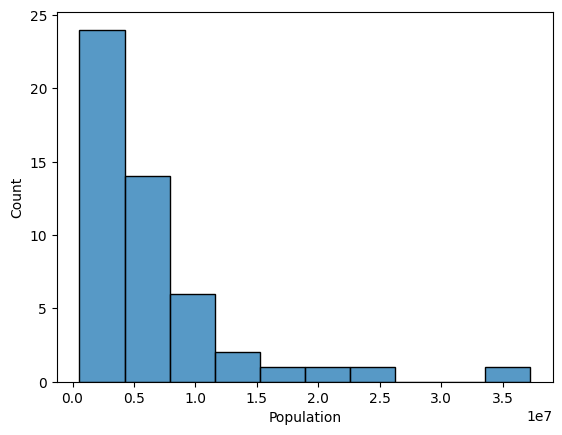

In [7]:
sns.histplot(data=df.Population, bins=10)

In [8]:
(pd.cut(df.Population, bins=10)).unique()

[(526935.67, 4232659.0], (4232659.0, 7901692.0], (7901692.0, 11570725.0], (11570725.0, 15239758.0], (15239758.0, 18908791.0], (18908791.0, 22577824.0], (22577824.0, 26246857.0], (33584923.0, 37253956.0]]
Categories (10, interval[float64, right]): [(526935.67, 4232659.0] < (4232659.0, 7901692.0] < (7901692.0, 11570725.0] < (11570725.0, 15239758.0] ... (22577824.0, 26246857.0] < (26246857.0, 29915890.0] < (29915890.0, 33584923.0] < (33584923.0, 37253956.0]]

In [9]:
df1 = df
df1["bins"] = pd.cut(x=df.Population, bins=10)

df1.sort_values("bins", inplace=True)

groups = []

for group, subset in df1.groupby("bins"):
    groups.append(
        {
            "GroupName": group,
            "TotalState": len(subset),
            "State": ", ".join(subset["Abbreviation"]),
        }
    )

df_groups = pd.DataFrame(groups)
print(df_groups)

                  GroupName  TotalState  \
0    (526935.67, 4232659.0]          24   
1    (4232659.0, 7901692.0]          14   
2   (7901692.0, 11570725.0]           6   
3  (11570725.0, 15239758.0]           2   
4  (15239758.0, 18908791.0]           1   
5  (18908791.0, 22577824.0]           1   
6  (22577824.0, 26246857.0]           1   
7  (26246857.0, 29915890.0]           0   
8  (29915890.0, 33584923.0]           0   
9  (33584923.0, 37253956.0]           1   

                                               State  
0  WY, OR, OK, CT, IA, MS, AR, KS, UT, NM, WV, NE...  
1  MO, WA, MA, IN, AZ, TN, MD, KY, MN, CO, AL, SC...  
2                             OH, MI, GA, NC, VA, NJ  
3                                             PA, IL  
4                                                 FL  
5                                                 NY  
6                                                 TX  
7                                                     
8                              

In [27]:
groups2 = []
i = 0
[
    groups2.append(
        {
            "GroupName": group,
            "TotalState": len(subset),
            "State": ", ".join(subset["Abbreviation"]),
        }
    )
    for group, subset in df1.groupby("bins")
]


df_groups2 = pd.DataFrame(groups2)
df_groups2["BinRange"] = [
    "Bottom 10%",
    "Bottom 20%",
    "Bottom 30%",
    "Bottom 40%",
    "Bottom 50%",
    "Bottom 60%",
    "Bottom 70%",
    "Bottom 80%",
    "Bottom 90%",
    "Bottom 100%",
]

print(f"{df_groups2=}")

df_groups2=                  GroupName  TotalState  \
0    (526935.67, 4232659.0]          24   
1    (4232659.0, 7901692.0]          14   
2   (7901692.0, 11570725.0]           6   
3  (11570725.0, 15239758.0]           2   
4  (15239758.0, 18908791.0]           1   
5  (18908791.0, 22577824.0]           1   
6  (22577824.0, 26246857.0]           1   
7  (26246857.0, 29915890.0]           0   
8  (29915890.0, 33584923.0]           0   
9  (33584923.0, 37253956.0]           1   

                                               State     BinRange  
0  WY, OR, OK, CT, IA, MS, AR, KS, UT, NM, WV, NE...   Bottom 10%  
1  MO, WA, MA, IN, AZ, TN, MD, KY, MN, CO, AL, SC...   Bottom 20%  
2                             OH, MI, GA, NC, VA, NJ   Bottom 30%  
3                                             PA, IL   Bottom 40%  
4                                                 FL   Bottom 50%  
5                                                 NY   Bottom 60%  
6                                      

<Axes: xlabel='State', ylabel='Population'>

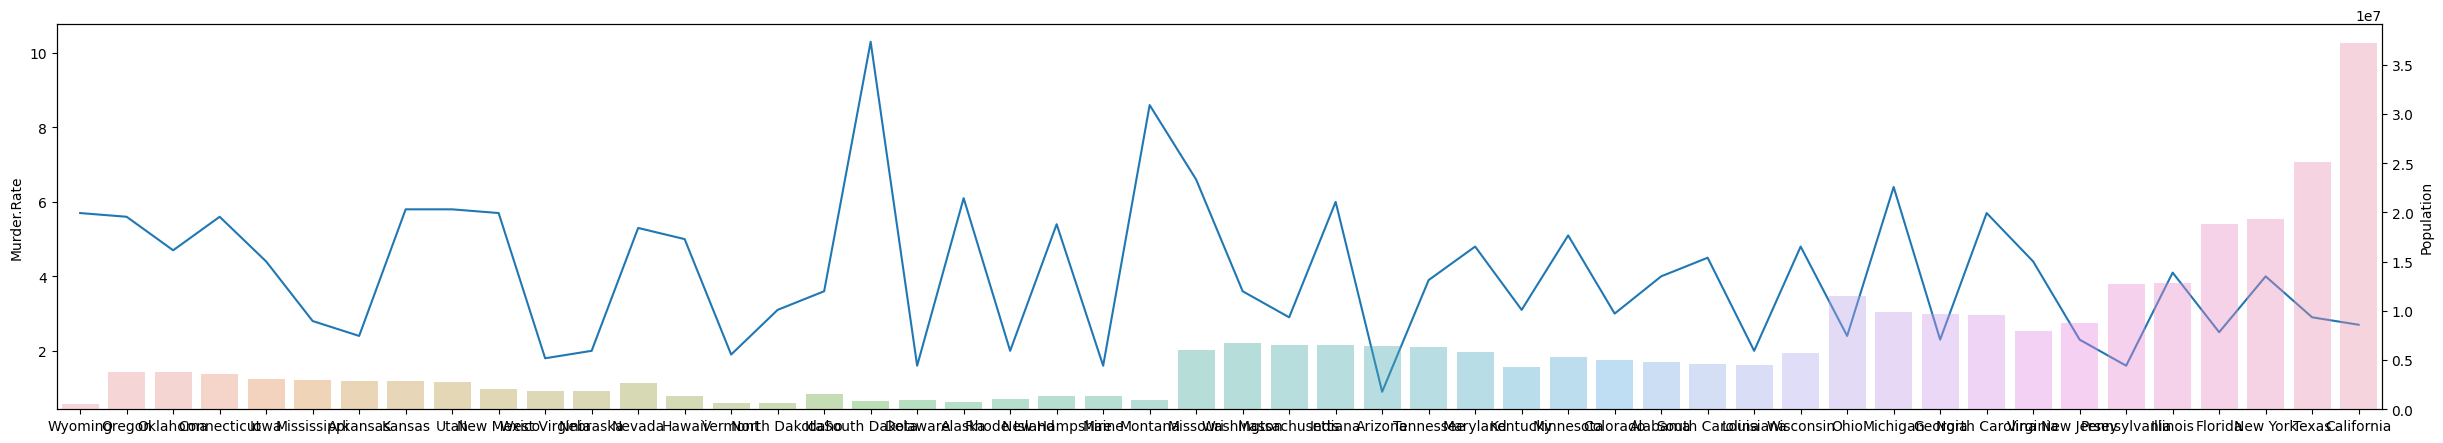

In [82]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None)

fig, ax1 = plt.subplots(figsize=(30,5))
sns.lineplot(data=df['Murder.Rate'], markers='o', ax=ax1)

ax2 = ax1.twinx()
plt.xticks(rotation=40)
sns.barplot(data=df, x='State', y='Population', alpha=0.4, ax=ax2)


<Axes: xlabel='Population', ylabel='Murder.Rate'>

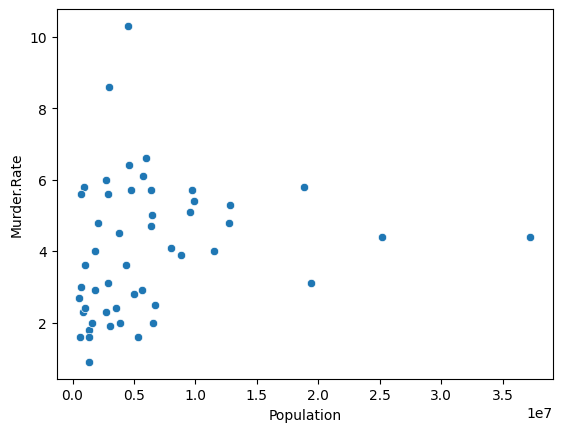

In [83]:
sns.scatterplot(data=df, x='Population', y='Murder.Rate')

In [99]:
q1, q3 = np.percentile(population, [25, 75])

print(f"{q1=}")
print(f"{q3=}")

list_in_q1_q3 = []

[list_in_q1_q3:= list_in_q1_q3 + [df['State'][i]] for i in range(len(df)) if df['Population'][i] > q1 and df['Population'][i] < q3]
# [print(state) for state in df if state['Population'] > q1 and state['Population'] < q3]

list_in_q1_q3

q1=1833004.25
q3=6680312.25


['Alabama',
 'Arizona',
 'Arkansas',
 'Colorado',
 'Connecticut',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maryland',
 'Massachusetts',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Nevada',
 'New Mexico',
 'Oklahoma',
 'Oregon',
 'South Carolina',
 'Tennessee',
 'Utah',
 'West Virginia',
 'Wisconsin']